In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings('ignore')



In [37]:
# Load the dataset
simData = pd.read_csv("data/earth_orbit_simulation.csv")

# The dataset contains the following columns:
# Input feature (time), X position, Y position
X_feature = simData[['time']]
y_target_x = simData['x']
y_target_y = simData['y']

In [39]:
X_train, X_test, y_train_x, y_test_x = train_test_split(X_feature, y_target_x, test_size=0.2, random_state=42)
_, _, y_train_y, y_test_y = train_test_split(X_feature, y_target_y, test_size=0.2, random_state=42)


In [41]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}


In [42]:
grid_search_x = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_x.fit(X_feature, y_target_x)  # You can use full data or X_train/y_train_x if you prefer
best_rf_x = grid_search_x.best_estimator_
y_pred_x_tuned = best_rf_x.predict(X_feature)

print("Best hyperparameters for X:", grid_search_x.best_params_)
print("Best (neg MSE) for X:", grid_search_x.best_score_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

In [43]:
grid_search_y = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_y.fit(X_feature, y_target_y)
best_rf_y = grid_search_y.best_estimator_
y_pred_y_tuned = best_rf_y.predict(X_feature)

print("Best hyperparameters for Y:", grid_search_y.best_params_)
print("Best (neg MSE) for Y:", grid_search_y.best_score_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_e

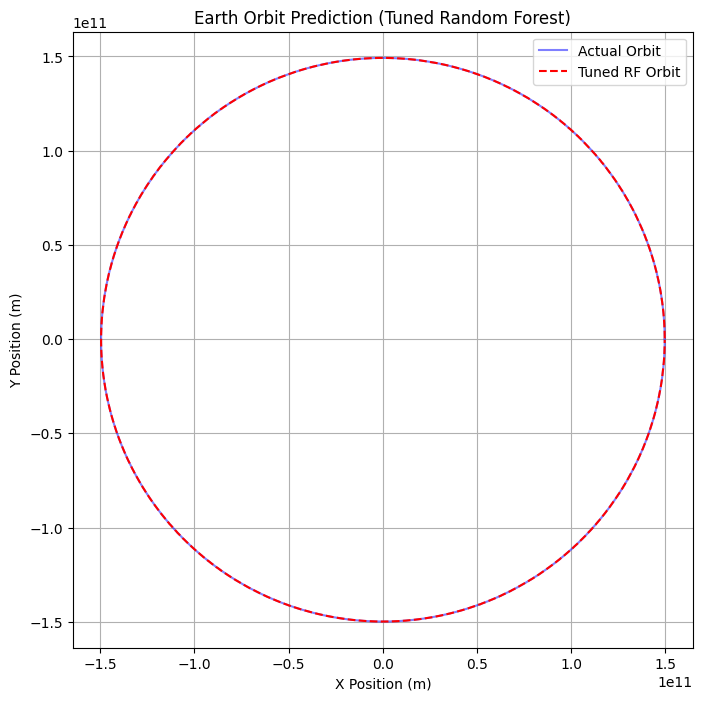

In [44]:
plt.figure(figsize=(8, 8))
plt.plot(y_target_x, y_target_y, label='Actual Orbit', color='blue', alpha=0.5)
plt.plot(y_pred_x_tuned, y_pred_y_tuned, label='Tuned RF Orbit', color='red', linestyle='--')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('Earth Orbit Prediction (Tuned Random Forest)')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()


In [45]:
# Evaluate the model performance

print("Tuned RF R² X:", r2_score(y_target_x, y_pred_x_tuned))
print("Tuned RF MSE X:", mean_squared_error(y_target_x, y_pred_x_tuned))

print("Tuned RF R² Y:", r2_score(y_target_y, y_pred_y_tuned))
print("Tuned RF MSE Y:", mean_squared_error(y_target_y, y_pred_y_tuned))


Tuned RF R² X: 0.9999991957963619
Tuned RF MSE X: 8998283106041012.0
Tuned RF R² Y: 0.9999990663420238
Tuned RF MSE Y: 1.0432414601273336e+16
